In [87]:
import numpy as np
from libs.utils import write__float32_as_int16,read_int16_as_float32, write__float32_as_int16
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display
from libs.MVDR import MVbeamformer2,MVbeamformer
import importlib
importlib.reload(libs.MVDR)

<module 'libs.MVDR' from 'C:\\Users\\tanabehikari\\github\\power_normalization\\libs\\MVDR.py'>

In [88]:
ch1_10dB=read_int16_as_float32('ch1/10dB/nf144032.wav')
ch2_10dB=read_int16_as_float32('ch2/10dB/nf144032.wav')
#tmp=read_int16_as_float32('ch2/m10dB/nf144032.wav')
mv1_10dB,mv2_10dB,W = MVbeamformer2(ch1_10dB,ch2_10dB,0)

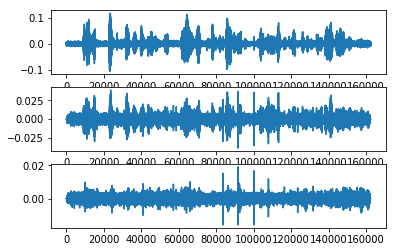

In [89]:
plt.subplot(3,1,1)
plt.plot(ch1_10dB)
plt.subplot(3,1,2)
plt.plot(mv1_10dB)
plt.subplot(3,1,3)
plt.plot(mv2_10dB)
IPython.display.Audio(ch1_10dB,rate=16000)

In [42]:
norm_ch1 = np.linalg.norm(ch1_10dB)
norm_ch2 = np.linalg.norm(ch2_10dB)
#norm_ch3 = np.linalg.norm(tmp)
print("norm of ch1/10dB.wav: {}".format(norm_ch1))
print("norm of ch2/10dB.wav: {}".format(norm_ch2))
#print("norm of なんでも.wav: {}".format(norm_ch3))
print("\n After MVDR")
norm_mv1 = np.linalg.norm(mv1_10dB)
norm_mv2 = np.linalg.norm(mv2_10dB)
print("norm of norm_mv1.wav: {}".format(norm_mv1))
print("norm of norm_mv2.wav: {}".format(norm_mv2))

print("\n After Normalized")
normalized_norm_1 = np.linalg.norm(mv1_10dB/norm_ch1*norm_org)
normalized_norm_2 = np.linalg.norm(mv2_10dB/norm_ch2*norm_org)
print("norm of 10dB.wav: {}".format(normalized_norm_1))
print("norm of -10dB.wav: {}".format(normalized_norm_2))

norm of 10dB.wav: 4.91982171527241
norm of -10dB.wav: 15.545036903136213
norm of org.wav: 15.54438139042597

 After Normalized
norm of 10dB.wav: 15.544381390425894
norm of -10dB.wav: 15.544381390425983


In [90]:
ch1_m10dB=read_int16_as_float32('ch1/m10dB/nf144032.wav')
ch2_m10dB=read_int16_as_float32('ch2/m10dB/nf144032.wav')
mv1_m10dB,mv2_m10dB,W = MVbeamformer2(ch1_m10dB,ch2_m10dB,0)

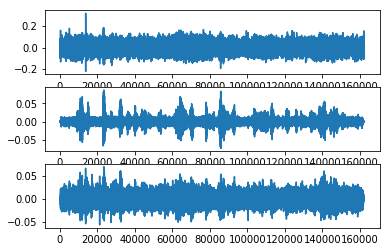

In [93]:
plt.subplot(3,1,1)
plt.plot(ch1_m10dB)
plt.subplot(3,1,2)
plt.plot(mv1_m10dB)
plt.subplot(3,1,3)
plt.plot(mv2_m10dB)
IPython.display.Audio(ch1_m10dB,rate=16000)

In [94]:
IPython.display.Audio(mv1_m10dB,rate=16000)

In [95]:
IPython.display.Audio(mv1_10dB,rate=16000)

In [ ]:
write__float32_as_int16('normalized_x1.wav', 16000, x1/norm_1*norm_org)
write__float32_as_int16('normalized_x2.wav', 16000, x2/norm_2*norm_org)